# Neds Rent Calculations and Projections

## Current Scenario

The current formula we have is as follows:
> Base level rent is £46 per week. Members pay an extra £1 per week in rent for every £3,000 earned in a year over £14,200 after tax Members shall pay an extra £1 a week in rent when their level of savings, investments and/or property exceed £14,200, plus an additional £1 per week for each additional £3,000 thereafter. This figure should be revised each year based on the following formula: Annual income based on working 35 hours a week at the national living wage (recommended by the Living Wage Foundation) minus tax paid based on the current personal tax allowance.

As a reference, here are the local housing assistance rates for Nottingham

![image](img/lha_rates.png)

Median rent for a five bedroom house in Nottingham is £2,210 pcm. Put another way; a good reference for us is that most people in Nottingham sharing large houses are paying about £450 pcm, not including bills. 

In [7]:
from House_Rent import *

 Maximum rent level is 300.2
 Minimum rent level is 200.1
 Maximum outgoings per month are 370.2
 Minimum outgoings per month are 270.1
 This means that the current maximum ratio of rents is 1.50,
 but the maximum ratio of outgoings is 1.37


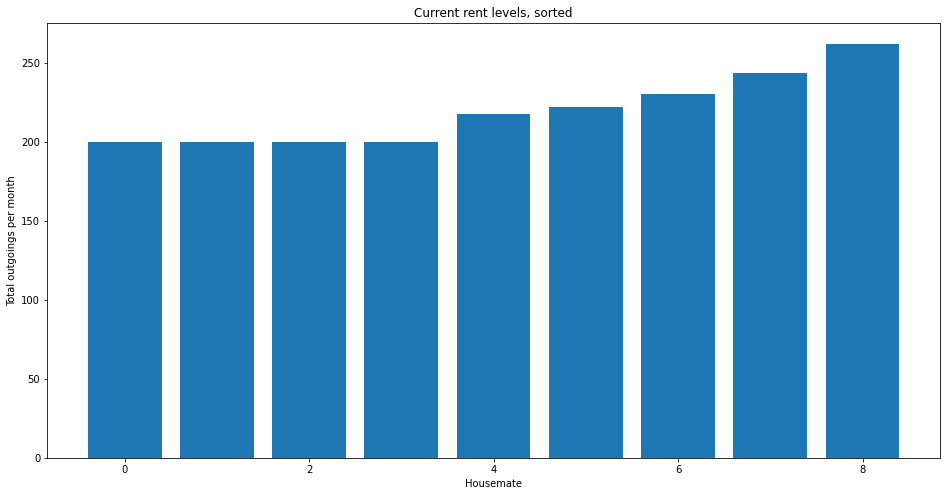

In [8]:

# #Produce Plot of house rents currently
np.set_printoptions(precision=2)
%precision %.2f

plt.rcParams['figure.figsize'] = (16, 8.0)
# plot_scenario_rents(scenario_current, HouseMateList)
print(f' Maximum rent level is {scenario_current.get_rent(H_Bezos):.1f}')
print(f' Minimum rent level is {scenario_current.get_rent(H_Asisi):.1f}')
print(f' Maximum outgoings per month are {scenario_current.get_rent(H_Bezos) + scenario_current.get_bills(H_Bezos):.1f}')
print(f' Minimum outgoings per month are {scenario_current.get_rent(H_Asisi) + scenario_current.get_bills(H_Asisi):.1f}')
print(f' This means that the current maximum ratio of rents is {scenario_current.get_rent(H_Bezos) / scenario_current.get_rent(H_Asisi) :.2f},\n but the maximum ratio of outgoings is {scenario_current.get_total(H_Bezos) / scenario_current.get_total(H_Asisi) :.2f}')
# outgoings_list = [scenario_current.get_total(h) for h in HouseMateList]
rent_list_current = [scenario_current.get_rent(h) for h in HouseMateList]
plt.bar(arange(len(HouseMateList)), sorted(rent_list_current))
plt.xlabel('Housemate')
plt.ylabel('Total outgoings per month')
plt.title('Current rent levels, sorted')
plt.show()

Text(0.5, 1.0, 'Current outgoings (when we include bills), Sorted')

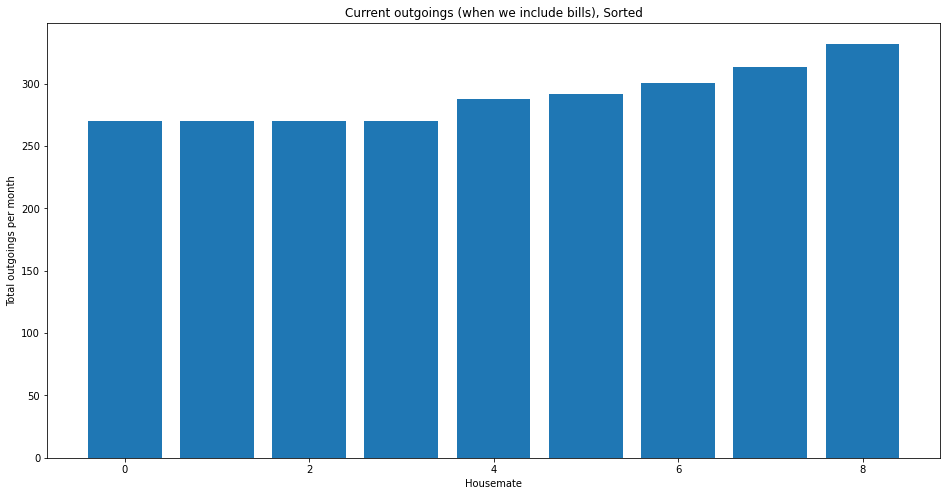

In [9]:

outgoings_list = [scenario_current.get_total(h) for h in HouseMateList]
plt.bar(arange(len(HouseMateList)), sorted(outgoings_list))
plt.xlabel('Housemate')
plt.ylabel('Total outgoings per month')
plt.title('Current outgoings (when we include bills), Sorted')

Which doesn't look very scaled!

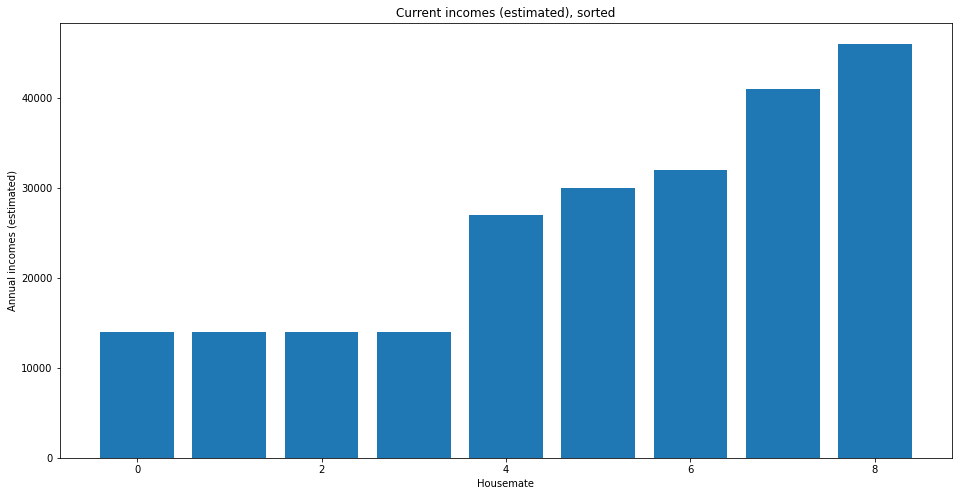

In [10]:

income_list = sorted([h.income for h in HouseMateList])
plt.bar(arange(len(HouseMateList)), income_list)
plt.xlabel('Housemate')
plt.ylabel('Annual incomes (estimated)')
plt.title('Current incomes (estimated), sorted')
plt.show()

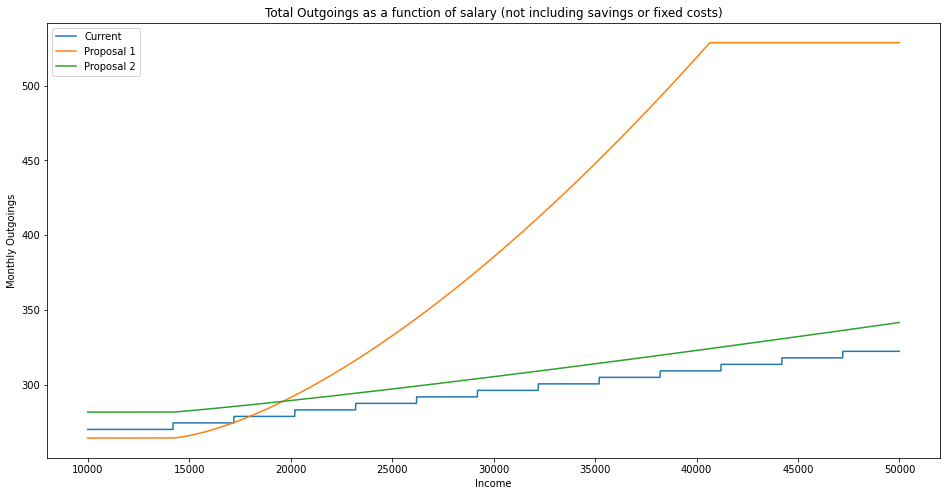

In [11]:
from House_Rent import *
income_range = arange(10000, 50000, 10)
scaling = 20


rent_current_list = [rent_formula_current_form(1.5, scenario_current.income_threshold, scenario_current.base_rent, 0, xi, scenario_current.savings_threshold) for xi in income_range]
rent_current_list = [x + scenario_current.bills_rule(scenario_current, H1) for x in rent_current_list]
rent_proposal_1_list = make_scenario_plot_data(scenario_proposed)
rent_proposal_2_list = make_scenario_plot_data(scenario_proposed_2)
plt.plot(income_range, rent_current_list)
plt.plot(income_range, rent_proposal_1_list)
plt.plot(income_range, rent_proposal_2_list)
# plt.ylim(100)
plt.xlabel('Income')
plt.ylabel('Monthly Outgoings')
plt.legend(['Current', 'Proposal 1', 'Proposal 2'])
plt.title('Total Outgoings as a function of salary (not including savings or fixed costs)')
plt.show()



In [12]:
current_income = get_house_income(HouseMateList, scenario_current)
proposal_1_income = get_house_income(HouseMateList, scenario_proposed)
proposal_2_income = get_house_income(HouseMateList, scenario_proposed_2)
print(f'Current income is {proposal_2_income}')
print(f'Proposal 1 would yield an income of {proposal_1_income}')
print(f'Proposal 2 would yield an income of {proposal_2_income}')

Current income is 31923.548413403056
Proposal 1 would yield an income of 36648.57375931743
Proposal 2 would yield an income of 31923.548413403056
